In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(random_state=0)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [4]:
lreg = LogisticRegression().fit(X_train,y_train)
lreg.score(X_test,y_test)

0.88

In [5]:
import mglearn

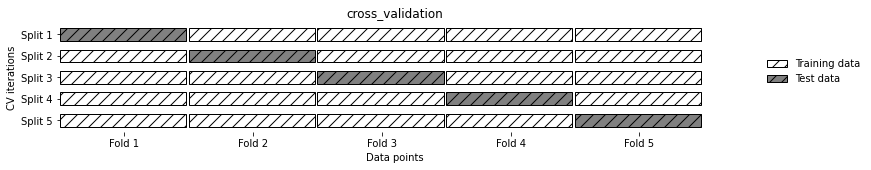

In [6]:
mglearn.plots.plot_cross_validation()

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [8]:
iris = load_iris()
lreg = LogisticRegression()
score =  cross_val_score(lreg,iris.data,iris.target)

In [9]:
print('{}'.format(score))

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [10]:
score =  cross_val_score(lreg,iris.data,iris.target,cv =10)

In [11]:
print(score.mean())

0.9733333333333334


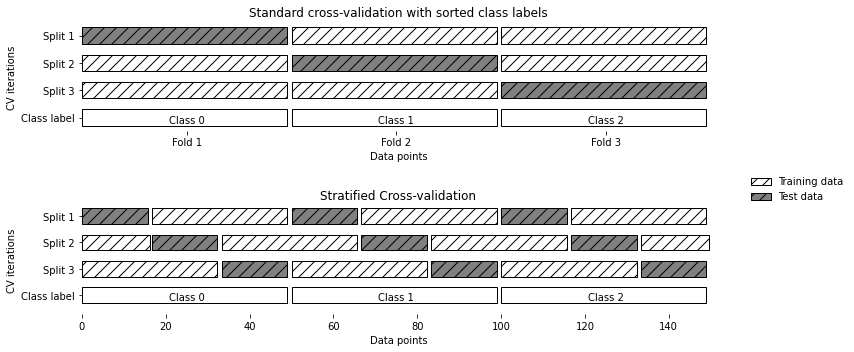

In [12]:
mglearn.plots.plot_stratified_cross_validation()

In [13]:
from sklearn.model_selection import KFold

In [14]:
kf = KFold(n_splits=5)

In [15]:
cross_val_score(lreg,iris.data,iris.target,cv=kf).mean()

0.9266666666666665

In [16]:
kf = KFold(random_state=0,shuffle=True,n_splits=5)

In [17]:
cross_val_score(lreg,iris.data,iris.target,cv=kf).mean()

0.9533333333333334

In [18]:
from sklearn.model_selection import LeaveOneOut

In [19]:
loo = LeaveOneOut()
scores = cross_val_score(lreg,iris.data,iris.target,cv=loo)
print(len(scores))
print(scores.mean())

150
0.9666666666666667


In [20]:
from sklearn.model_selection import ShuffleSplit

In [21]:
split =  ShuffleSplit(test_size=0.5,train_size=0.5,n_splits=10)
scores = cross_val_score(lreg,iris.data,iris.target,cv=split)

In [22]:
scores.mean()

0.9559999999999998

In [23]:
from sklearn.model_selection import GroupKFold

In [24]:
X,y = make_blobs(n_samples=12,random_state=0)

In [25]:
groups = [0,0,0,1,1,1,2,2,3,3,3,3]
score = cross_val_score(lreg,X,y,groups,cv=GroupKFold(n_splits=3))

In [26]:
score.mean()

0.7388888888888889

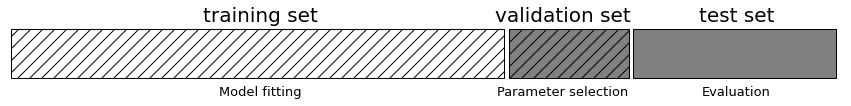

In [27]:
mglearn.plots.plot_threefold_split()

# Grid Search

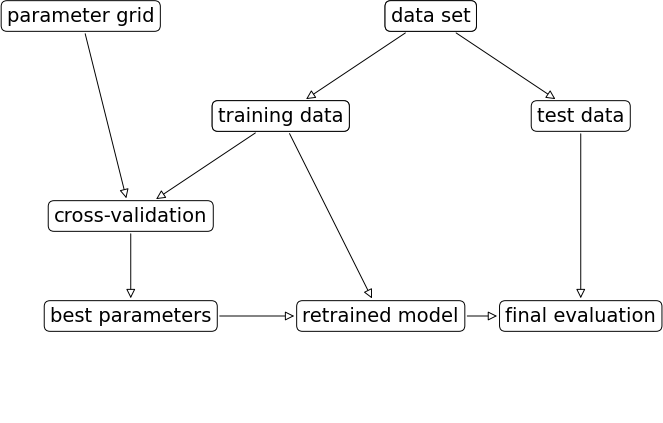

In [28]:
mglearn.plots.plot_grid_search_overview()

In [29]:
from sklearn.svm import SVC

In [30]:
X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_trainval,y_trainval,random_state=1)

In [31]:
X_train.shape

(84, 4)

In [32]:
X_valid.shape

(28, 4)

In [33]:
y_train.shape

(84,)

In [34]:
best_score = 0
for gamma in[0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svc =  SVC(C=C,gamma=gamma).fit(X_train,y_train)
        score = svc.score(X_valid,y_valid)
        if(score > best_score):
            best_score = score
            best_param = {'C':C,'gamma':gamma}

In [35]:
best_score

0.9642857142857143

In [36]:
best_param

{'C': 10, 'gamma': 0.001}

In [37]:
svc = SVC(**best_param).fit(X_train,y_train)

In [38]:
svc.score(X_test,y_test)

0.8947368421052632

In [39]:
import numpy as np
best_score = 0
for gamma in[0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svc =  SVC(C=C,gamma=gamma)
        scores =  cross_val_score(svc,X_trainval,y_trainval,cv=5)
        score = np.mean(scores)
        if(score > best_score):
            best_score = score
            best_param = {'C':C,'gamma':gamma}

In [40]:
best_score

0.9731225296442687

In [41]:
best_param

{'C': 10, 'gamma': 0.1}

In [42]:
svc = SVC(**best_param).fit(X_trainval,y_trainval)

In [43]:
svc.score(X_test,y_test)

0.9736842105263158

In [44]:
#pip install matplotlib==3.2.0

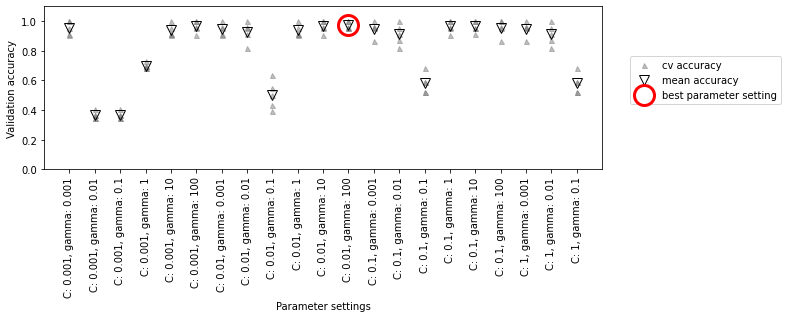

In [45]:
mglearn.plots.plot_cross_val_selection()

#  Grid Search

In [46]:
params = {'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [48]:
grid_search =  GridSearchCV(SVC(),params,cv=5)

In [49]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

In [50]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [51]:
grid_search.score(X_test,y_test)

0.9736842105263158

In [52]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [53]:
grid_search.best_score_

0.9731225296442687

In [54]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

In [55]:
import pandas as pd

In [56]:
data = pd.DataFrame(grid_search.cv_results_)

In [57]:
print(data.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.001849      0.000786         0.000708        0.000359   0.001   
1       0.000984      0.000021         0.000438        0.000020   0.001   
2       0.000989      0.000012         0.000441        0.000022   0.001   
3       0.001016      0.000028         0.000444        0.000013   0.001   
4       0.001041      0.000021         0.000440        0.000013   0.001   

  param_gamma                        params  split0_test_score  \
0       0.001  {'C': 0.001, 'gamma': 0.001}           0.347826   
1       0.010   {'C': 0.001, 'gamma': 0.01}           0.347826   
2       0.100    {'C': 0.001, 'gamma': 0.1}           0.347826   
3           1      {'C': 0.001, 'gamma': 1}           0.347826   
4          10     {'C': 0.001, 'gamma': 10}           0.347826   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.347826           0.363636           0.363636           0.

In [58]:
scores = np.array(data.mean_test_score).reshape(6,6)

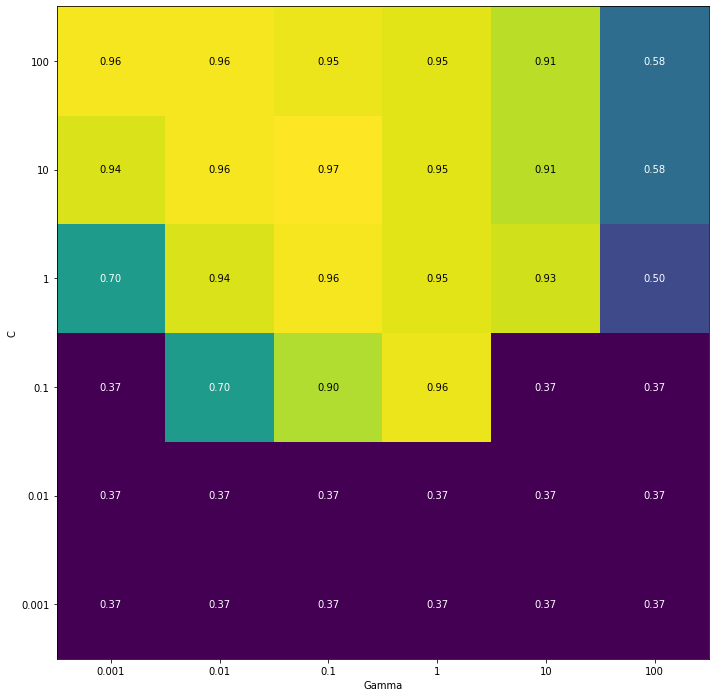

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
mglearn.tools.heatmap(scores,xlabel='Gamma',xticklabels=params['gamma'],yticklabels=params['C'],ylabel='C',cmap='viridis')

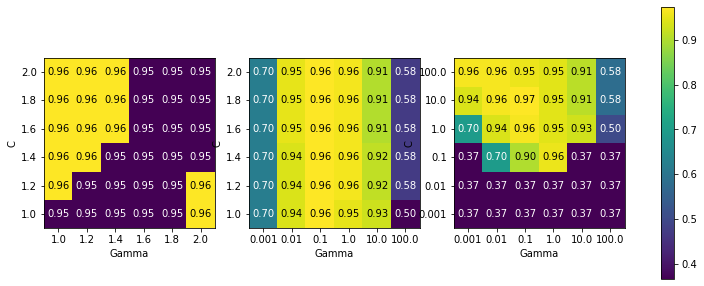

In [60]:
fig,axes =  plt.subplots(1,3,figsize=(13,5))

param_1 = {'C':np.linspace(1,2,6),'gamma':np.linspace(1,2,6)}
param_2 = {'C':np.linspace(1,2,6),'gamma':np.logspace(-3,2,6)}
param_3 = {'C':np.logspace(-3,2,6),'gamma':np.logspace(-3,2,6)}


for params, ax in zip([param_1,param_2,param_3],axes):
    grid_search = GridSearchCV(SVC(),params,cv=5)
    grid_search.fit(X_train,y_train)
    
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    score_image = mglearn.tools.heatmap(scores,xlabel='Gamma',xticklabels=params['gamma'],yticklabels=params['C'],ylabel='C',cmap='viridis',ax=ax)

plt.colorbar(score_image,ax=axes.tolist())
    

In [61]:
param_grid = [{'kernel':['rbf'],'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]},{'kernel':['linear'],'C':[0.001,0.01,0.1,1,10,100]}]


In [62]:
grid_search = GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}])

In [63]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [64]:
grid_search.best_score_

0.9731225296442687

In [65]:
scores = cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),iris.data,iris.target,cv=5)

In [66]:
scores.mean()

0.9666666666666668

# Imbalanced Datasets

In [67]:
from sklearn.datasets import load_digits

In [69]:
digits = load_digits()
y = digits.target == 9

In [74]:
y.size

1797

In [76]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=0)

In [78]:
from sklearn.dummy import DummyClassifier

In [79]:
dummy_ =  DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent =  dummy_.predict(X_test)

In [80]:
np.unique(pred_most_frequent)

array([False])

In [81]:
dummy_.score(X_test,y_test)

0.8955555555555555

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtree = DecisionTreeClassifier().fit(X_train,y_train)
pred_dummy = dtree.predict(X_test)

In [86]:
dtree.score(X_test,y_test)

0.9577777777777777

In [88]:
from sklearn.linear_model import LogisticRegression

In [90]:
lreg =  LogisticRegression(C=0.1).fit(X_train,y_train)

In [91]:
pred_lreg = lreg.predict(X_test)
lreg.score(X_test,y_test)

0.9844444444444445

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
confusion =  confusion_matrix(y_test,pred_lreg)

In [94]:
confusion

array([[402,   1],
       [  6,  41]])

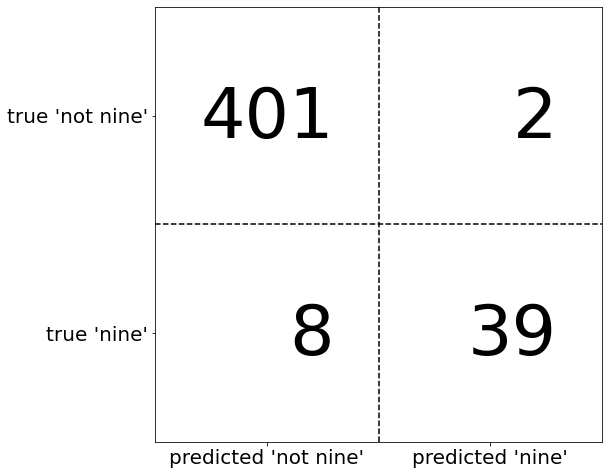

In [95]:
mglearn.plots.plot_confusion_matrix_illustration()

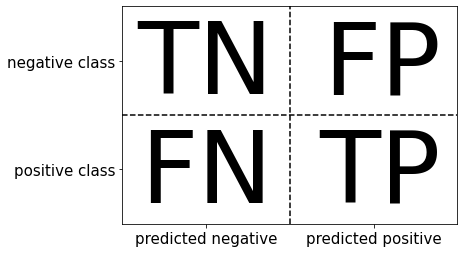

In [96]:
mglearn.plots.plot_binary_confusion_matrix()

In [99]:
from sklearn.metrics import f1_score

In [100]:
f1_score(y_test,pred_lreg )

0.9213483146067415

In [101]:
f1_score(y_test,pred_most_frequent)

0.0

In [102]:
f1_score(y_test,pred_dummy)

0.7912087912087913

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,target_names = ['Not Nine','Nine']))

              precision    recall  f1-score   support

    Not Nine       0.90      1.00      0.94       403
        Nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [110]:
from sklearn.datasets import make_blobs

In [116]:
X,y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],random_state=22)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

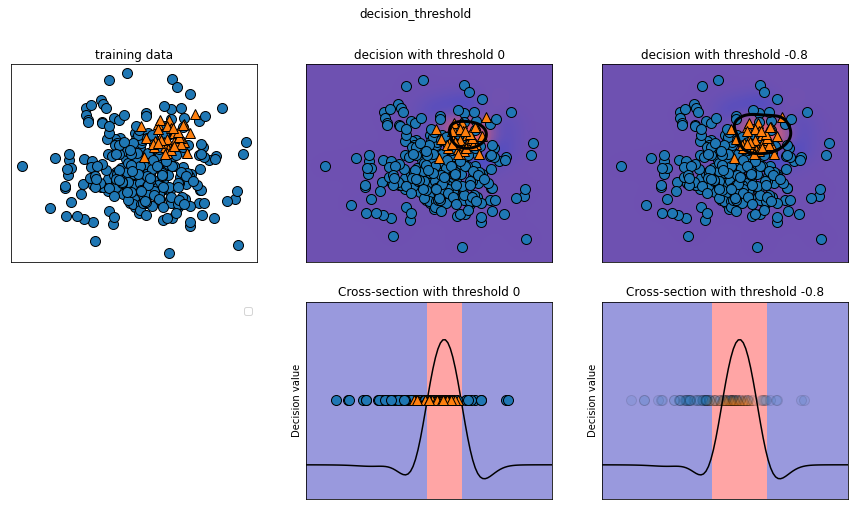

In [118]:
mglearn.plots.plot_decision_threshold()

In [120]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [121]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [122]:
svc.decision_function(X_test) 

array([-0.99973208, -1.00148617, -1.1386043 , -0.98505482, -1.01044247,
       -1.00027441, -1.00609413,  0.88395198, -1.00467053, -1.00283866,
       -1.00097712,  1.07030762, -1.02076344, -0.40435353, -0.48739733,
       -1.00121046, -1.09560781, -1.44572917, -0.99908802, -1.00070245,
       -0.44364565, -1.01170286, -0.99918954, -1.0861769 , -1.33291363,
       -1.00320657, -0.99076097, -1.09564958,  0.63212214, -0.99238394,
       -1.47090403,  0.19153373,  0.74430046, -1.0084656 , -1.15104651,
       -1.02852903, -1.00840776, -1.23180696, -1.0031964 , -1.00023926,
       -1.0013854 , -1.00003771, -1.10114776, -0.98779744, -1.05818617,
       -1.00105363,  0.5230006 ,  0.97789353, -0.99559099,  0.52008479,
       -1.25711078, -1.08267667, -0.99828696, -1.00385465,  0.08620484,
       -0.99871026, -1.06221884, -1.02415268, -1.08797969, -1.06010122,
        0.36988055, -1.05630237, -0.99981001, -0.24173165, -1.02857919,
       -1.00058106, -0.99968788, -1.00115386, -0.99882791,  1.25

In [123]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [124]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))

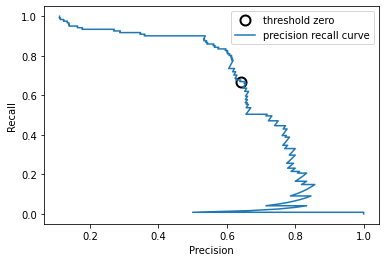

In [128]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2],
random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')

#  Precision Recall Curve

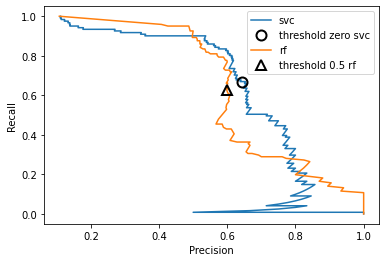

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

#  ROC 

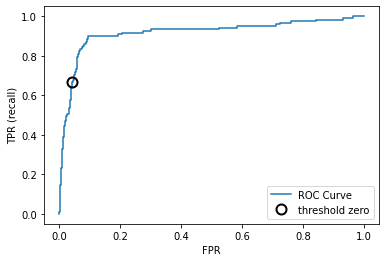

In [131]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [132]:
close_zero

55

In [133]:
thresholds

array([ 2.4675732 ,  1.4675732 ,  1.44543522,  1.3883083 ,  1.36399692,
        1.32045274,  1.30793345,  1.27362292,  1.26639366,  1.26549139,
        1.26218681,  1.23639476,  1.23272763,  1.23268814,  1.21274253,
        1.18867389,  1.17585471,  1.15089351,  1.14644476,  1.11697474,
        1.11164916,  1.07039562,  1.0618427 ,  1.02737422,  1.0221831 ,
        0.92622847,  0.92061278,  0.91871812,  0.91025922,  0.82556742,
        0.80058895,  0.78826384,  0.76431489,  0.73658061,  0.70361806,
        0.63202742,  0.61868639,  0.58699872,  0.47424583,  0.43174875,
        0.42161182,  0.41674789,  0.41170002,  0.41068324,  0.40404247,
        0.39698761,  0.37952465,  0.37283557,  0.36963527,  0.23779958,
        0.210375  ,  0.19734035,  0.16642743,  0.08952996,  0.06954494,
        0.0431748 , -0.04779208, -0.06239381, -0.08749885, -0.09744136,
       -0.11308646, -0.13793376, -0.14655591, -0.16681464, -0.23766011,
       -0.26421748, -0.28671312, -0.35207398, -0.35960512, -0.36

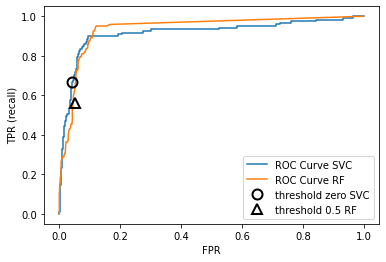

In [134]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [135]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


In [136]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


In [139]:
from sklearn.metrics import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v